## Checking all libraries version

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import __version__ as sklearn_version

print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Seaborn version:", sns.__version__)
print("Matplotlib version:", plt.matplotlib.__version__)
print("Scikit-learn version:", sklearn_version)

NumPy version: 1.24.3
Pandas version: 1.5.3
Seaborn version: 0.12.2
Matplotlib version: 3.8.0
Scikit-learn version: 1.4.0


## Importing required libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [3]:
%%time
df= pd.read_csv("Cabinet-Project_Regression-2.csv", low_memory=False)

CPU times: total: 15.6 ms
Wall time: 9.09 ms


## Expolatory Data analysis (EDA) & Data cleaning

In [4]:
df.head()

,Activity,Height (m),Weather (Celsius),%Overtime,Productivity (hr/unit),No. of Labors,Unnamed: 6
0,Columns Formwork,4,38,0.25,9.230769231,12,NaN
1,Columns Formwork,4,33,0.25,9.375,15,NaN
2,Columns Formwork,4,30,0.25,9.523809524,20,NaN
3,Columns Formwork,4,30,0.25,9.444444444,17,NaN
4,Columns Formwork,4,30,0.00,9.333333333,14,NaN


In [5]:
df.tail()

,Activity,Height (m),Weather (Celsius),%Overtime,Productivity (hr/unit),No. of Labors,Unnamed: 6
2057,Retaining Walls Concrete Pouring,4,30,0.00,4.22,19,NaN
2058,Retaining Walls Concrete Pouring,4,27,0.25,3.64,12,NaN
2059,Retaining Walls Concrete Pouring,4,29,0.25,3.72,16,NaN
2060,Retaining Walls Concrete Pouring,4,26,0.25,3.67,11,NaN
2061,Retaining Walls Concrete Pouring,4,25,0.25,3.66,15,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2062 entries, 0 to 2061
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Activity                2062 non-null   object 
 1   Height (m)              2062 non-null   int64  
 2   Weather (Celsius)       2062 non-null   int64  
 3   %Overtime               2062 non-null   object 
 4   Productivity (hr/unit)  2062 non-null   object 
 5   No. of Labors           2062 non-null   int64  
 6   Unnamed: 6              0 non-null      float64
dtypes: float64(1), int64(3), object(3)
memory usage: 112.9+ KB


In [7]:
# Convert 'Date' to datetime format
#df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [8]:
df.shape

(2062, 7)

In [9]:
# check the columns in data
df.columns

Index(['Activity', 'Height (m)', 'Weather (Celsius)', '%Overtime',
       'Productivity (hr/unit)', 'No. of Labors', 'Unnamed: 6'],
      dtype='object')

In [10]:
# check the datatypes of columns
df.dtypes

Activity                   object
Height (m)                  int64
Weather (Celsius)           int64
%Overtime                  object
Productivity (hr/unit)     object
No. of Labors               int64
Unnamed: 6                float64
dtype: object

In [11]:
df.describe()

,Height (m),Weather (Celsius),No. of Labors,Unnamed: 6
count,2062.000000,2062.000000,2062.000000,0.0
mean,5.679922,26.960233,39.192532,NaN
std,1.974700,3.631413,31.690220,NaN
min,4.000000,19.000000,6.000000,NaN
25%,4.000000,25.000000,19.000000,NaN
50%,4.000000,27.000000,28.000000,NaN
75%,8.000000,29.000000,39.000000,NaN
max,8.000000,38.000000,173.000000,NaN


array([[<Axes: title={'center': 'Height (m)'}>,
        <Axes: title={'center': 'Weather (Celsius)'}>],
       [<Axes: title={'center': 'No. of Labors'}>,
        <Axes: title={'center': 'Unnamed: 6'}>]], dtype=object)

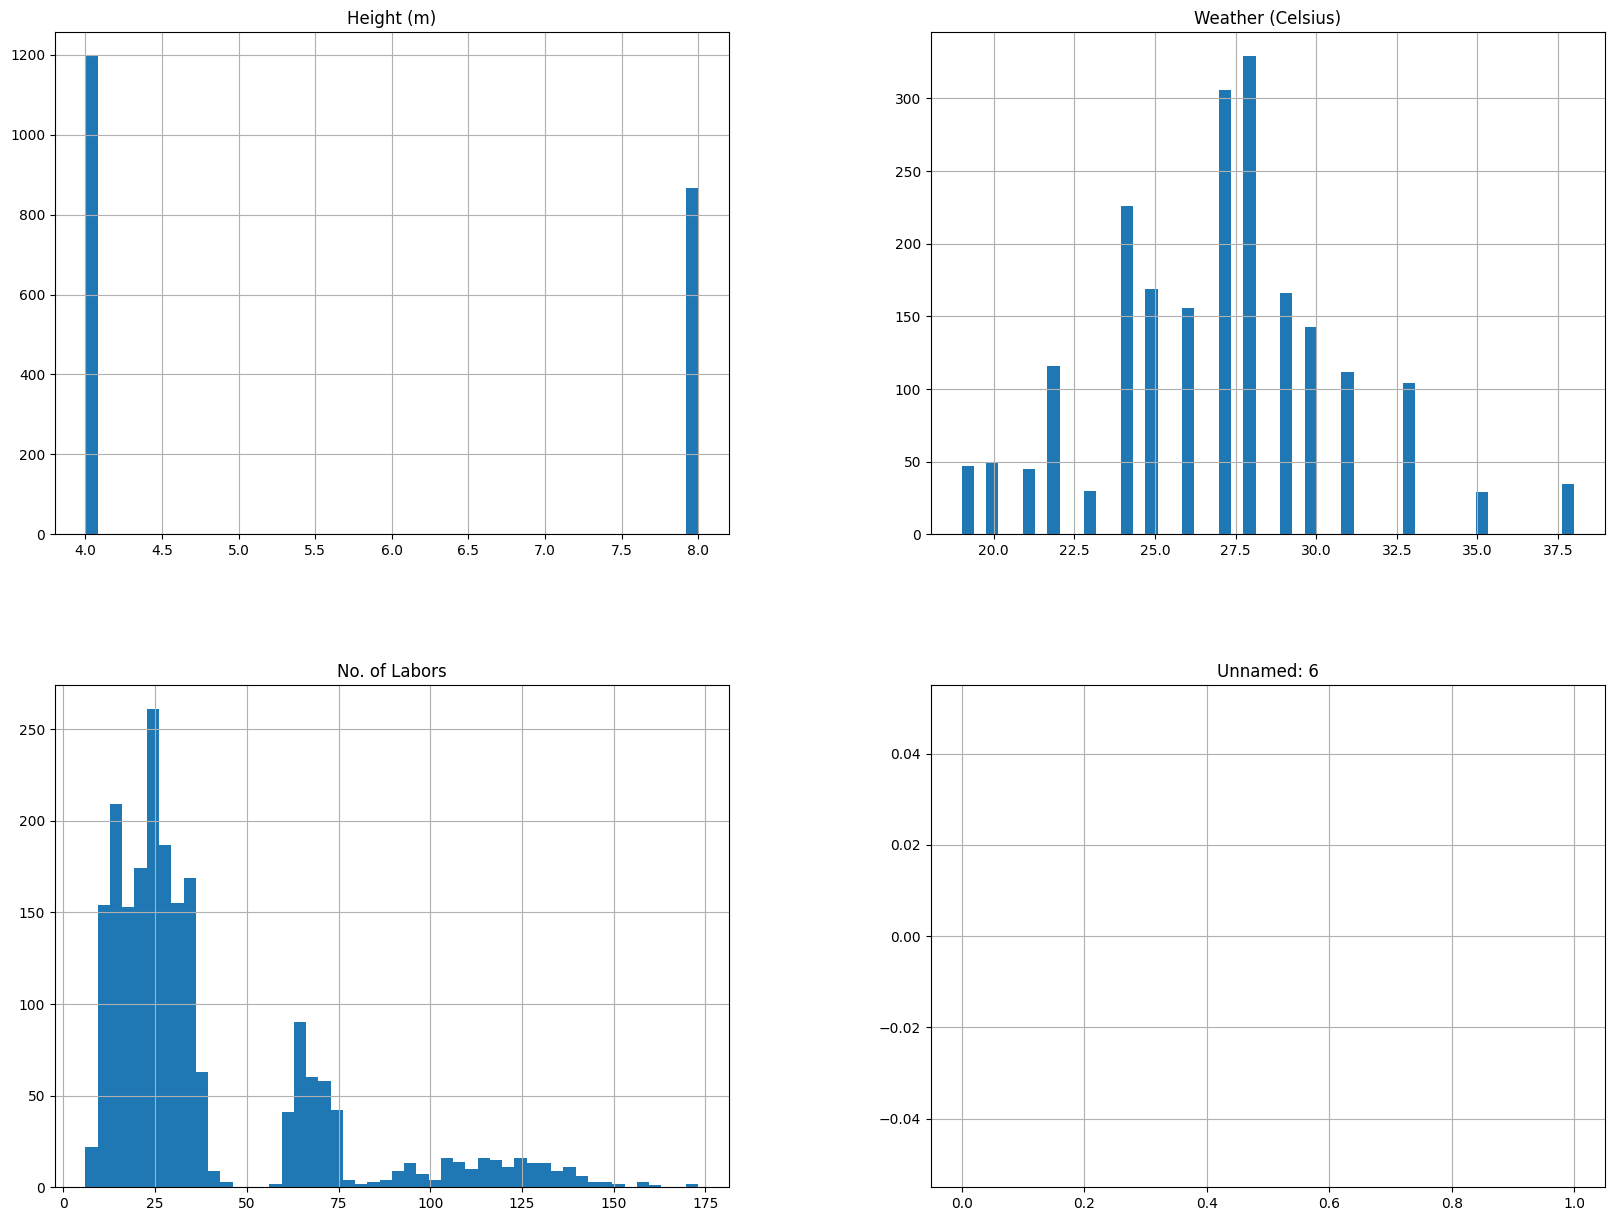

In [12]:
df.hist(bins=50, figsize=(20, 15))

In [13]:
df.count()

Activity                  2062
Height (m)                2062
Weather (Celsius)         2062
%Overtime                 2062
Productivity (hr/unit)    2062
No. of Labors             2062
Unnamed: 6                   0
dtype: int64

In [14]:
# Assuming your DataFrame is named df
# Get the list of unnamed columns
unnamed_columns = [col for col in df.columns if 'Unnamed' in col]

# Drop the unnamed columns
df = df.drop(columns=unnamed_columns)

In [15]:
# check the columns in data
df.columns

Index(['Activity', 'Height (m)', 'Weather (Celsius)', '%Overtime',
       'Productivity (hr/unit)', 'No. of Labors'],
      dtype='object')

In [16]:
# check for some null or missing values in our dataset
df.isna().sum().to_numpy()

array([0, 0, 0, 0, 0, 0], dtype=int64)

In [17]:
#df.fillna(df.mode().iloc[0], inplace=True)

In [18]:
# check for some null or missing values in our dataset
#df.isna().sum().to_numpy()

In [19]:
df.head(50)

,Activity,Height (m),Weather (Celsius),%Overtime,Productivity (hr/unit),No. of Labors
0,Columns Formwork,4,38,0.25,9.230769231,12
1,Columns Formwork,4,33,0.25,9.375,15
2,Columns Formwork,4,30,0.25,9.523809524,20
3,Columns Formwork,4,30,0.25,9.444444444,17
4,Columns Formwork,4,30,0.00,9.333333333,14
5,Columns Formwork,4,29,0.00,8.727272727,12
6,Columns Formwork,4,35,0.25,9.411764706,16
7,Columns Formwork,4,33,0.25,9.473684211,18
8,Columns Formwork,4,28,0.25,9.130434783,21
9,Columns Formwork,4,28,0.25,8.947368421,17


In [20]:
df.tail(50)

,Activity,Height (m),Weather (Celsius),%Overtime,Productivity (hr/unit),No. of Labors
2012,Retaining Walls Concrete Pouring,8,28,0.25,3.87,12
2013,Retaining Walls Concrete Pouring,8,25,0.25,3.93,11
2014,Retaining Walls Concrete Pouring,8,27,0.25,3.87,12
2015,Retaining Walls Concrete Pouring,8,27,0.00,3.86,14
2016,Retaining Walls Concrete Pouring,8,25,0.25,3.87,12
2017,Retaining Walls Concrete Pouring,8,22,0.25,3.45,10
2018,Retaining Walls Concrete Pouring,4,33,0.25,4.07,11
2019,Retaining Walls Concrete Pouring,4,30,0.00,4.12,17
2020,Retaining Walls Concrete Pouring,8,30,0.00,4.33,13
2021,Retaining Walls Concrete Pouring,8,29,0.25,3.91,18


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2062 entries, 0 to 2061
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Activity                2062 non-null   object
 1   Height (m)              2062 non-null   int64 
 2   Weather (Celsius)       2062 non-null   int64 
 3   %Overtime               2062 non-null   object
 4   Productivity (hr/unit)  2062 non-null   object
 5   No. of Labors           2062 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 96.8+ KB


In [22]:
df.count()

Activity                  2062
Height (m)                2062
Weather (Celsius)         2062
%Overtime                 2062
Productivity (hr/unit)    2062
No. of Labors             2062
dtype: int64

In [23]:
# checking the duplicate roes in the data
#duplicate_rows= df[df.duplicated()]

# print the duplicate rows
#print("numbers of duplicates rows:" , duplicate_rows.shape)

In [24]:
# removing the duplicate rows
#df = df.drop_duplicates()

In [25]:
# checking the duplicate roes in the data
#duplicate_rows= df[df.duplicated()]

# print the duplicate rows
#print("numbers of duplicates rows:" , duplicate_rows.shape)

In [26]:
# check the columns in data
df.columns

Index(['Activity', 'Height (m)', 'Weather (Celsius)', '%Overtime',
       'Productivity (hr/unit)', 'No. of Labors'],
      dtype='object')

In [27]:
# Verify the changes
df['Productivity (hr/unit)'].value_counts()

5.96           66
4.97           53
7.43           52
3.53           46
3.02           44
               ..
94.22683337     1
98.49276227     1
98.58103062     1
98.07692308     1
3.67            1
Name: Productivity (hr/unit), Length: 577, dtype: int64

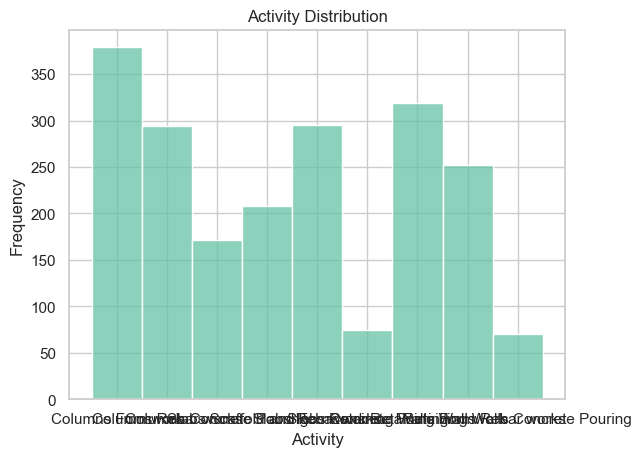

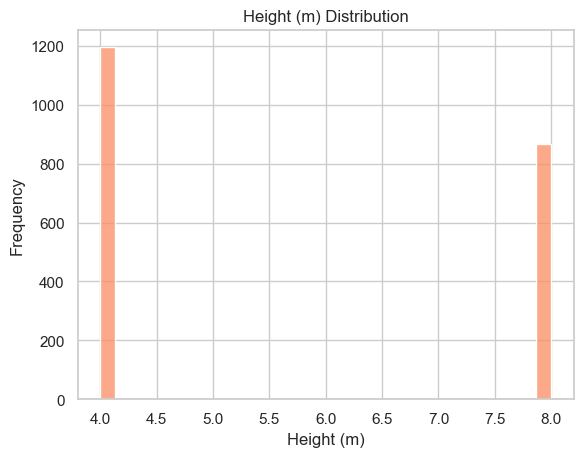

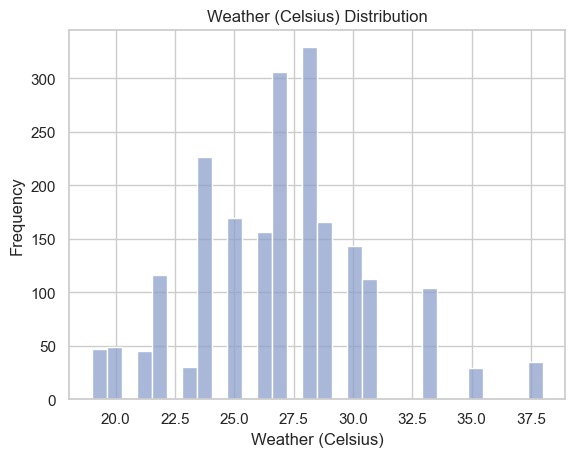

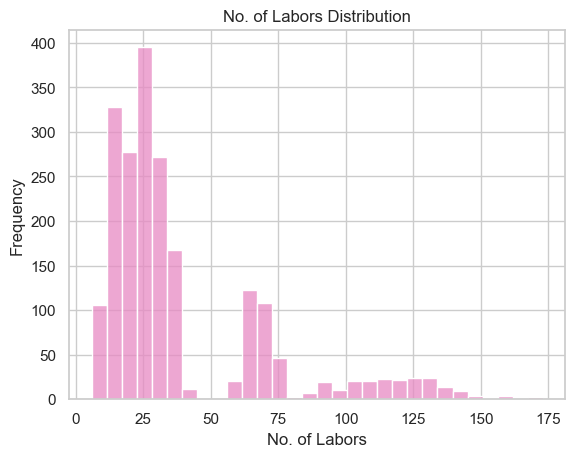

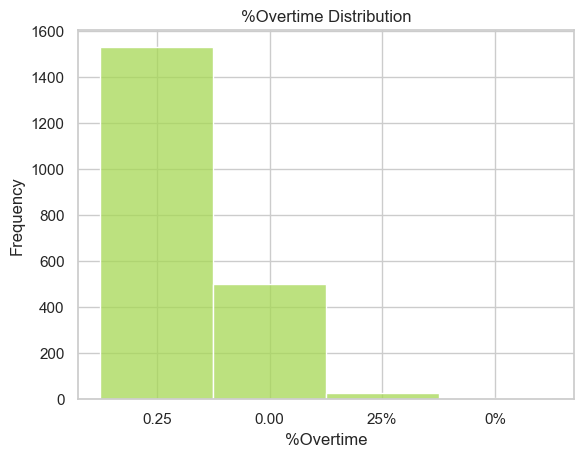

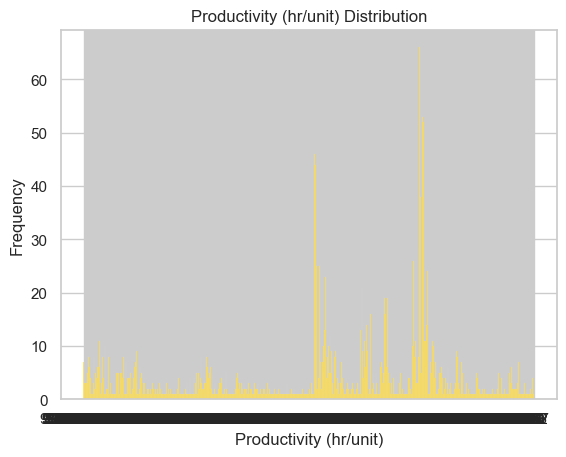

In [28]:
import seaborn as sns
import itertools

# Define a color palette for the plots
color_palette = itertools.cycle(sns.color_palette('Set2'))

# Iterate over the list of features
for feature in ['Activity', 'Height (m)', 'Weather (Celsius)', 'No. of Labors', '%Overtime', 'Productivity (hr/unit)']:
    # Create a new figure and set the style using Seaborn
    plt.figure()
    sns.set(style='whitegrid')

    # Plot the feature using a histogram with a different color
    sns.histplot(data=df, x=feature, bins=30, color=next(color_palette))

    # Set labels and title
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'{feature} Distribution')

    # Show the plot
    plt.show()


## Data preprocessing

In [29]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate through each column
for col in df.columns:
    # Check if the column dtype is object (string)
    if df[col].dtype == 'object':
        # Encode the values in the column
        df[col] = label_encoder.fit_transform(df[col])

# Verify the changes
df.head()

,Activity,Height (m),Weather (Celsius),%Overtime,Productivity (hr/unit),No. of Labors
0,1,4,38,2,457,12
1,1,4,33,2,464,15
2,1,4,30,2,470,20
3,1,4,30,2,466,17
4,1,4,30,1,463,14


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2062 entries, 0 to 2061
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Activity                2062 non-null   int32
 1   Height (m)              2062 non-null   int64
 2   Weather (Celsius)       2062 non-null   int64
 3   %Overtime               2062 non-null   int32
 4   Productivity (hr/unit)  2062 non-null   int32
 5   No. of Labors           2062 non-null   int64
dtypes: int32(3), int64(3)
memory usage: 72.6 KB


## Checking features correlations with target variable

In [31]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Extract correlation of features with the target variable 'Total_Productivity'
target_correlation = correlation_matrix['Productivity (hr/unit)']

# Sort the correlation values in descending order
target_correlation_sorted = target_correlation.abs().sort_values(ascending=False)

# Print the correlation values
print(target_correlation_sorted)

Productivity (hr/unit)    1.000000
Weather (Celsius)         0.103084
No. of Labors             0.052247
Height (m)                0.018434
%Overtime                 0.012628
Activity                  0.002271
Name: Productivity (hr/unit), dtype: float64


In [32]:
# Extract feature names from sorted correlation values
all_features = target_correlation_sorted.index.tolist()

# Create new DataFrame containing all the features
X = df[all_features]

# Extract target variable
y = df['Productivity (hr/unit)']

In [33]:
y = df['Productivity (hr/unit)']
y

0       457
1       464
2       470
3       466
4       463
       ... 
2057    124
2058     99
2059    105
2060    101
2061    100
Name: Productivity (hr/unit), Length: 2062, dtype: int32

In [34]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the features
X_normalized = scaler.fit_transform(X)

# Convert the normalized features back to a DataFrame
X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)

# Verify the changes
X_normalized_df.head()

,Productivity (hr/unit),Weather (Celsius),No. of Labors,Height (m),%Overtime,Activity
0,0.793403,1.000000,0.035928,0.0,0.666667,0.125
1,0.805556,0.736842,0.053892,0.0,0.666667,0.125
2,0.815972,0.578947,0.083832,0.0,0.666667,0.125
3,0.809028,0.578947,0.065868,0.0,0.666667,0.125
4,0.803819,0.578947,0.047904,0.0,0.333333,0.125


## Split the data into Train and Test sets

In [35]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Verify the shapes of the train and test sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1649, 6)
y_train shape: (1649,)
X_test shape: (413, 6)
y_test shape: (413,)


In [36]:
#X_train.head()

In [37]:
#y_train.head()

## Proposed ACO-MLPNN Model

In [38]:
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold

# Set random seed for reproducibility
np.random.seed(42)
random_state = 42

# Define the Ant Colony Optimizer class
class AntColonyOptimizer:
    def __init__(self, num_ants, iterations, pheromone_decay, alpha, beta, graph):
        self.num_ants = num_ants
        self.iterations = iterations
        self.pheromone_decay = pheromone_decay
        self.alpha = alpha
        self.beta = beta
        self.graph = graph
        self.num_nodes = len(graph)
        self.pheromones = np.ones((self.num_nodes, self.num_nodes))
        np.fill_diagonal(self.pheromones, 0)

    def find_path(self):
        best_path = None
        best_path_length = np.inf
        for _ in range(self.iterations):
            paths = []
            path_lengths = []
            for ant in range(self.num_ants):
                path = [0]
                while len(path) < self.num_nodes:
                    next_node = self.select_next_node(path)
                    path.append(next_node)
                paths.append(path)
                path_lengths.append(self.calculate_path_length(path))
                self.update_pheromones(path, path_lengths[-1])
                if path_lengths[-1] < best_path_length:
                    best_path = path.copy()
                    best_path_length = path_lengths[-1]
            self.pheromones *= (1 - self.pheromone_decay)
        return best_path

    def select_next_node(self, path):
        current_node = path[-1]
        unvisited_nodes = list(set(range(self.num_nodes)) - set(path))
        probabilities = []
        total = 0
        for node in unvisited_nodes:
            probabilities.append((self.pheromones[current_node][node] ** self.alpha) *
                                 (self.graph[current_node][node] ** self.beta))
            total += probabilities[-1]
        probabilities = [p / total for p in probabilities]
        next_node = np.random.choice(unvisited_nodes, p=probabilities)
        return next_node

    def calculate_path_length(self, path):
        length = 0
        for i in range(len(path) - 1):
            length += self.graph[path[i]][path[i + 1]]
        return length

    def update_pheromones(self, path, path_length):
        for i in range(len(path) - 1):
            self.pheromones[path[i]][path[i + 1]] += 1 / path_length

# Assuming X_train, X_test, y_train, and y_test are already defined

# Define the feature correlation graph (replace with actual feature correlations)
num_features = X_train.shape[1]
graph = np.random.rand(num_features, num_features)

# Initialize the Ant Colony Optimizer
num_ants = 10
iterations = 100
pheromone_decay = 0.1
alpha = 1
beta = 2
aco = AntColonyOptimizer(num_ants, iterations, pheromone_decay, alpha, beta, graph)

# Find the best feature subset using ACO
best_feature_subset = aco.find_path()

# Select the best features from the training and test sets
X_train_aco = X_train[:, best_feature_subset]
X_test_aco = X_test[:, best_feature_subset]

# Train the MLPRegressor model
ann_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', random_state=random_state)
ann_model.fit(X_train_aco, y_train)

# Apply k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=random_state)
mae_scores = cross_val_score(ann_model, X_train_aco, y_train, scoring='neg_mean_absolute_error', cv=kf)
mse_scores = cross_val_score(ann_model, X_train_aco, y_train, scoring='neg_mean_squared_error', cv=kf)
r2_scores = cross_val_score(ann_model, X_train_aco, y_train, scoring='r2', cv=kf)

print("Cross-Validation Metrics:")
print("Mean Absolute Error (CV):", -mae_scores.mean())
print("Mean Squared Error (CV):", -mse_scores.mean())
print("R-squared Score (CV):", r2_scores.mean())

# Predictions on the test set
y_pred_ann = ann_model.predict(X_test_aco)

# Evaluation on test set
mae = mean_absolute_error(y_test, y_pred_ann)
mse = mean_squared_error(y_test, y_pred_ann)
r2 = r2_score(y_test, y_pred_ann)

print("\nTest Set Metrics:")
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

# Iterate through the test set and print actual and predicted values with labels
print("\nActual Value\tPredicted Value")
for actual, predicted in zip(y_test, y_pred_ann):
    print(f"{actual}\t{predicted}")

Cross-Validation Metrics:
Mean Absolute Error (CV): 0.6098698023903545
Mean Squared Error (CV): 1.1117943243140718
R-squared Score (CV): 0.9999483682772908

Test Set Metrics:
Mean Absolute Error: 0.4717040512412
Mean Squared Error: 1.8778165196884922
R-squared Score: 0.9999187723979728

Actual Value	Predicted Value
167	166.7750720080979
91	90.15361233327286
85	84.61842377385656
360	359.9951562038339
449	449.0587145995263
151	150.97341934700898
135	135.06610019602613
570	570.0504278673043
186	186.35902010182465
87	86.69122158552256
216	216.03918708979555
121	121.00964048069312
136	136.05459182920825
77	76.18633056924052
97	97.31161811430032
84	83.65692671003673
473	472.6083387112365
183	183.41690608833443
49	47.8654323520857
143	143.0526360203566
299	299.31676096878357
236	235.59313389352894
414	414.0398465696844
167	166.7750720080979
327	326.8019327789806
394	393.8853731534243
136	136.38232842680642
85	84.63641112147072
138	138.026096239182
128	127.67688414889048
137	137.1158065296238


## ANN Model without ACO

In [39]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming X_train, X_test, y_train, and y_test are already defined

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train MLPRegressor with regularization (alpha) and dropout
ann_model = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', 
                         alpha=0.001, # regularization parameter
                         random_state=42,
                         max_iter=1000, # increase max_iter for better convergence
                         early_stopping=True, # enable early stopping
                         n_iter_no_change=10, # stop training if no improvement for 10 iterations
                         validation_fraction=0.1, # use 10% of data for validation
                         )

ann_model.fit(X_train_scaled, y_train)

# Predictions on the training set
y_pred_train = ann_model.predict(X_train_scaled)

# Evaluation on the training set
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print("Training Set Metrics:")
print("Mean Absolute Error:", mae_train)
print("Mean Squared Error:", mse_train)
print("R-squared Score:", r2_train)

# Predictions on the test set
y_pred_ann = ann_model.predict(X_test_scaled)

# Evaluation on the test set
mae = mean_absolute_error(y_test, y_pred_ann)
mse = mean_squared_error(y_test, y_pred_ann)
r2 = r2_score(y_test, y_pred_ann)

print("\nTest Set Metrics:")
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

# Initialize KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation for MAE
mae_scores = cross_val_score(ann_model, X_train_scaled, y_train, scoring='neg_mean_absolute_error', cv=kf)
# Perform cross-validation for MSE
mse_scores = cross_val_score(ann_model, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=kf)
# Perform cross-validation for R-squared
r2_scores = cross_val_score(ann_model, X_train_scaled, y_train, scoring='r2', cv=kf)

# Take the negative mean for MAE and MSE as cross_val_score returns negated values
mae_scores = -mae_scores
mse_scores = -mse_scores

print("\nCross-Validation Metrics:")
print("Mean Absolute Error (CV):", mae_scores.mean())
print("Mean Squared Error (CV):", mse_scores.mean())
print("R-squared Score (CV):", r2_scores.mean())

# Iterate through the test set and print actual and predicted values with labels
print("\nActual Value\tPredicted Value")
for actual, predicted in zip(y_test, y_pred_ann):
    print(f"{actual}\t{predicted}")

Training Set Metrics:
Mean Absolute Error: 6.268555676476602
Mean Squared Error: 71.50142583226439
R-squared Score: 0.9967348622429021

Test Set Metrics:
Mean Absolute Error: 6.763348762794456
Mean Squared Error: 89.79567588737136
R-squared Score: 0.9961157613918772

Cross-Validation Metrics:
Mean Absolute Error (CV): 8.274783751605728
Mean Squared Error (CV): 135.73450310924008
R-squared Score (CV): 0.9936976859273301

Actual Value	Predicted Value
167	163.12792623234213
91	105.2540297799389
85	77.53712107946929
360	346.39507249735624
449	450.9670523293459
151	154.34772058682472
135	133.65052790705698
570	574.9390831242616
186	176.72080944059496
87	98.63570066664558
216	221.78443230658402
121	128.7003636636105
136	139.91278749268238
77	73.85459910234417
97	101.29433449103801
84	83.05701034913889
473	479.84796763689724
183	173.89158034320084
49	37.69780884680502
143	140.8943504328185
299	286.3508581090268
236	233.7250397352822
414	413.033640140811
167	163.12792623234213
327	328.50473837

## Ridge Linear Regression Model

In [40]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize Ridge regression model
ridge = Ridge()

# Define a grid of hyperparameters to search over
param_grid = {'alpha': [0.1, 1, 10, 100]}  # You can add more values for alpha if needed

# Perform grid search to find the best combination of hyperparameters
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model
best_ridge = grid_search.best_estimator_

# Make predictions on the training set using the best model
y_pred_train_ridge = best_ridge.predict(X_train)

# Evaluate the model on the training set
mae_train_ridge = mean_absolute_error(y_train, y_pred_train_ridge)
mse_train_ridge = mean_squared_error(y_train, y_pred_train_ridge)
r2_train_ridge = r2_score(y_train, y_pred_train_ridge)

print("Ridge Regression (Training Set):")
print("Best alpha:", best_ridge.alpha)
print("Mean Absolute Error:", mae_train_ridge)
print("Mean Squared Error:", mse_train_ridge)
print("R-squared Score:", r2_train_ridge)

# Make predictions on the testing set using the best model
y_pred_ridge = best_ridge.predict(X_test)

# Evaluate the model on the testing set
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("\nRidge Regression (Test Set):")
print("Best alpha:", best_ridge.alpha)
print("Mean Absolute Error:", mae_ridge)
print("Mean Squared Error:", mse_ridge)
print("R-squared Score:", r2_ridge)

# Print actual and predicted values
print("\nActual \t\t Predicted")
print("===============================")
for actual, predicted in zip(y_test, y_pred_ridge):
    print(f"{actual:.2f} \t\t {predicted:.2f}")

Ridge Regression (Training Set):
Best alpha: 0.1
Mean Absolute Error: 0.11713313598419839
Mean Squared Error: 0.01891873331487127
R-squared Score: 0.9999991360693896

Ridge Regression (Test Set):
Best alpha: 0.1
Mean Absolute Error: 0.12376596373196007
Mean Squared Error: 0.02044146266822434
R-squared Score: 0.9999991157757017

Actual 		 Predicted
167.00 		 167.07
91.00 		 91.11
85.00 		 85.15
360.00 		 359.87
449.00 		 448.81
151.00 		 151.08
135.00 		 135.08
570.00 		 569.71
186.00 		 186.05
87.00 		 87.12
216.00 		 216.02
121.00 		 121.16
136.00 		 136.08
77.00 		 77.19
97.00 		 97.10
84.00 		 84.14
473.00 		 472.78
183.00 		 183.06
49.00 		 49.18
143.00 		 143.06
299.00 		 298.93
236.00 		 235.98
414.00 		 413.86
167.00 		 167.07
327.00 		 326.92
394.00 		 393.85
136.00 		 136.09
85.00 		 85.16
138.00 		 138.08
128.00 		 128.12
137.00 		 137.10
181.00 		 181.05
491.00 		 490.81
168.00 		 168.06
493.00 		 492.80
136.00 		 136.09
115.00 		 115.13
300.00 		 299.92
100.00 		 100.12
524

## Multiple Regression Model

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize individual regressor models
lr_model = LinearRegression()
svm_model = SVR(kernel='linear')
dt_model = DecisionTreeRegressor()

# Initialize the voting regressor with Linear Regression, SVM, and Decision Tree
voting_reg = VotingRegressor(estimators=[('lr', lr_model), ('svm', svm_model), ('dt', dt_model)])

# Train the voting regressor
voting_reg.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = voting_reg.predict(X_train)

# Evaluate the model on the training set
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print("Training Set Evaluation:")
print("Mean Absolute Error:", train_mae)
print("Mean Squared Error:", train_mse)
print("R-squared Score:", train_r2)

# Make predictions on the testing set
y_pred = voting_reg.predict(X_test)

# Evaluate the model on the testing set
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nTesting Set Evaluation:")
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

# Print actual and predicted values for testing set
print("\nActual \t\t Predicted (Testing Set)")
print("===================================")
for actual, predicted in zip(y_test, y_pred):
    print(f"{actual:.2f} \t\t {predicted:.2f}")

# Print actual and predicted values for training set
print("\nActual \t\t Predicted (Training Set)")
print("====================================")
for actual, predicted in zip(y_train, y_train_pred):
    print(f"{actual:.2f} \t\t {predicted:.2f}")

Training Set Evaluation:
Mean Absolute Error: 15.74210141446211
Mean Squared Error: 383.3757620816384
R-squared Score: 0.982493010994417

Testing Set Evaluation:
Mean Absolute Error: 16.499914911842918
Mean Squared Error: 413.81424187689674
R-squared Score: 0.9820998813249605

Actual 		 Predicted (Testing Set)
167.00 		 174.52
91.00 		 100.79
85.00 		 100.43
360.00 		 336.52
449.00 		 418.38
151.00 		 160.50
135.00 		 144.23
570.00 		 520.82
186.00 		 187.44
87.00 		 101.93
216.00 		 217.32
121.00 		 136.07
136.00 		 145.59
77.00 		 91.07
97.00 		 104.97
84.00 		 98.41
473.00 		 438.59
183.00 		 185.01
49.00 		 64.84
143.00 		 146.70
299.00 		 286.23
236.00 		 232.59
414.00 		 389.48
167.00 		 174.52
327.00 		 313.79
394.00 		 370.21
136.00 		 146.41
85.00 		 100.49
138.00 		 148.29
128.00 		 136.02
137.00 		 147.27
181.00 		 182.41
491.00 		 459.51
168.00 		 175.07
493.00 		 456.71
136.00 		 146.13
115.00 		 122.82
300.00 		 286.02
100.00 		 113.64
524.00 		 479.98
213.00 		 209.23
21

## Random Forest Model

In [42]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming X_train, X_test, y_train, and y_test are already defined

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust n_estimators as needed
rf_model.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred_rf = rf_model.predict(X_train)

# Evaluate the model on the training set
mae_train_rf = mean_absolute_error(y_train, y_train_pred_rf)
mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
r2_train_rf = r2_score(y_train, y_train_pred_rf)

print("Training Set Evaluation (Random Forest):")
print("Mean Absolute Error:", mae_train_rf)
print("Mean Squared Error:", mse_train_rf)
print("R-squared Score:", r2_train_rf)

# Make predictions on the testing set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model on the testing set
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nTesting Set Evaluation (Random Forest):")
print("Mean Absolute Error:", mae_rf)
print("Mean Squared Error:", mse_rf)
print("R-squared Score:", r2_rf)

# Initialize KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation for MAE
mae_scores_rf = cross_val_score(rf_model, X_train, y_train, scoring='neg_mean_absolute_error', cv=kf)
# Perform cross-validation for MSE
mse_scores_rf = cross_val_score(rf_model, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)
# Perform cross-validation for R-squared
r2_scores_rf = cross_val_score(rf_model, X_train, y_train, scoring='r2', cv=kf)

# Take the negative mean for MAE and MSE as cross_val_score returns negated values
mae_scores_rf = -mae_scores_rf
mse_scores_rf = -mse_scores_rf

print("\nCross-Validation Metrics (Random Forest):")
print("Mean Absolute Error (CV):", mae_scores_rf.mean())
print("Mean Squared Error (CV):", mse_scores_rf.mean())
print("R-squared Score (CV):", r2_scores_rf.mean())

# Print actual and predicted values for testing set
print("\nActual \t\t Predicted (Testing Set)")
print("===================================")
for actual, predicted in zip(y_test, y_pred_rf):
    print(f"{actual:.2f} \t\t {predicted:.2f}")

# Print actual and predicted values for training set
print("\nActual \t\t Predicted (Training Set)")
print("====================================")
for actual, predicted in zip(y_train, y_train_pred_rf):
    print(f"{actual:.2f} \t\t {predicted:.2f}")

Training Set Evaluation (Random Forest):
Mean Absolute Error: 0.07622801697998664
Mean Squared Error: 0.02771061249241957
R-squared Score: 0.9999987345851349

Testing Set Evaluation (Random Forest):
Mean Absolute Error: 0.22288135593220276
Mean Squared Error: 0.19609128329297884
R-squared Score: 0.9999915177949744

Cross-Validation Metrics (Random Forest):
Mean Absolute Error (CV): 0.24439742101869646
Mean Squared Error (CV): 0.25871876429953006
R-squared Score (CV): 0.9999881783015299

Actual 		 Predicted (Testing Set)
167.00 		 167.00
91.00 		 91.09
85.00 		 85.00
360.00 		 358.53
449.00 		 448.95
151.00 		 151.36
135.00 		 135.00
570.00 		 569.58
186.00 		 185.55
87.00 		 87.00
216.00 		 216.10
121.00 		 121.63
136.00 		 135.99
77.00 		 75.95
97.00 		 97.05
84.00 		 84.00
473.00 		 473.06
183.00 		 182.97
49.00 		 49.05
143.00 		 143.00
299.00 		 298.91
236.00 		 235.63
414.00 		 415.22
167.00 		 167.00
327.00 		 326.58
394.00 		 394.01
136.00 		 136.00
85.00 		 85.00
138.00 		 137.

## ALL models performance comparison

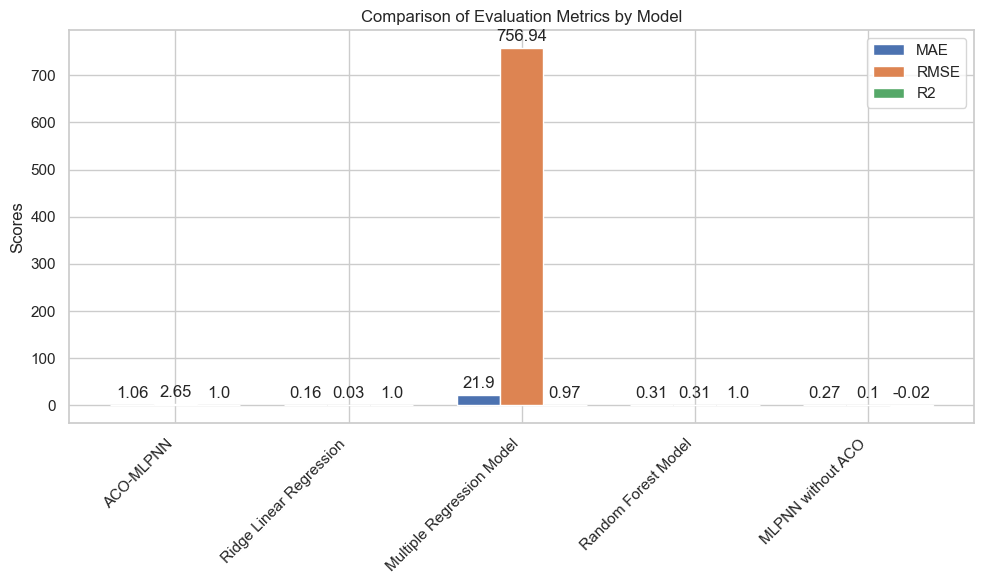

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Evaluation metrics results for each model
models = ['ACO-MLPNN', 'Ridge Linear Regression', 'Multiple Regression Model', 'Random Forest Model', 'MLPNN without ACO']
mae_values = [1.0552861737930221, 0.15523258746514232, 21.89706636729527, 0.310990415335463,  0.2718749146410413]
rmse_values = [2.6469435080176225, 0.03213793119446199, 756.9434510255709, 0.31281597444089426,  0.09651454723425452]
r2_values = [0.9998826241265437, 0.9999985748778795, 0.96643415378830, 0.9999861285108201,  -0.016649622681132348]  # Removed extra value

# Plotting
x = np.arange(len(models))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, mae_values, width, label='MAE')
rects2 = ax.bar(x, rmse_values, width, label='RMSE')
rects3 = ax.bar(x + width, r2_values, width, label='R2')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Comparison of Evaluation Metrics by Model')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')  # Rotate labels for better readability
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()
